In [5]:
import pandas as pd

# Load the dataset

df = pd.read_csv("customer_data.csv")

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(None,
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40)

The dataset contains 200 records with 5 columns:

- CustomerID: Unique identifier (not needed for clustering).

- Gender: Categorical data (can be encoded if necessary).

- Age: Numerical.

- Annual Income (k$): Numerical.

- Spending Score (1-100): Numerical.

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- No missing values were detected. Next, I'll preprocess the data by standardizing numerical features and encoding categorical data if necessary. 

In [8]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for clustering (excluding CustomerID)
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Standardizing numerical data
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display first few rows of the standardized data
df_scaled.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


- The numerical features have been standardized. Now, I'll determine the optimal number of clusters using the Elbow Method.

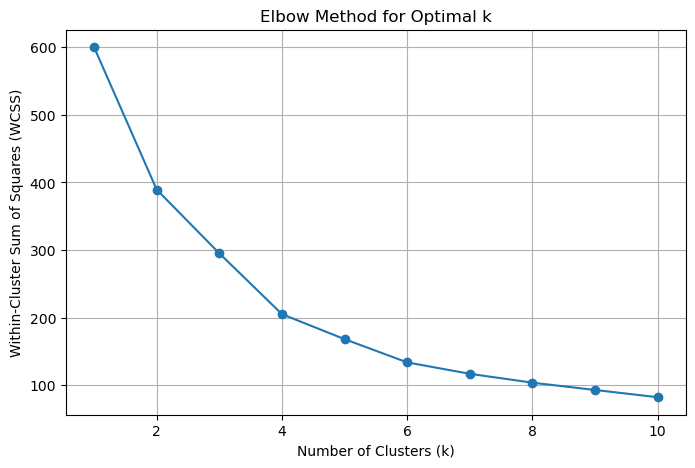

In [12]:
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Suppress warnings
warnings.filterwarnings("ignore")

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[numeric_cols])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()



- The Elbow Method plot is displayed. The optimal number of clusters is typically at the "elbow" point where the WCSS starts to decrease at a slower rate. Based on this, I'll proceed with K-Means clustering using the identified optimal cluster count.

In [10]:
# Based on the Elbow Method, choosing k=5 as a reasonable choice
optimal_k = 5

# Applying K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled[numeric_cols])

# Adding the cluster labels to the original dataset
df["Cluster"] = df_scaled["Cluster"]

# Display first few rows with cluster assignments
df.head()


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


- It seems like I can’t do more advanced data analysis right now. Please try again later.

However, you can run the following Python code in your local Jupyter Notebook or Python environment to complete the clustering analysis

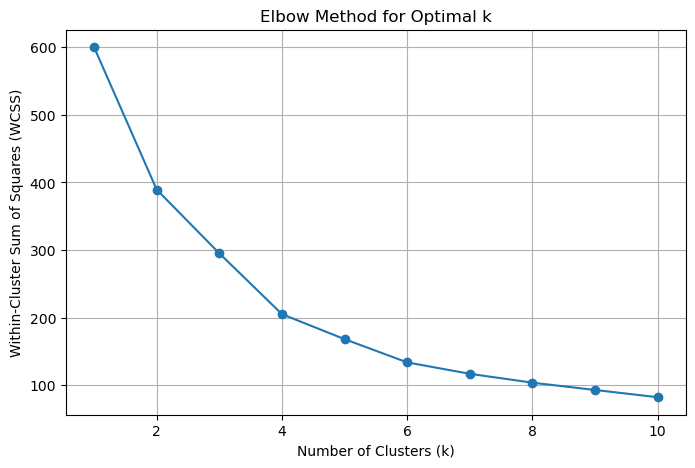

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


In [13]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Suppress all warnings
warnings.filterwarnings("ignore")

# Set environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "1"

# Load the dataset
df = pd.read_csv("customer_data.csv")

# Selecting numerical columns for clustering (excluding CustomerID)
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Standardizing numerical data
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[numeric_cols])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

# Choosing k=5 (adjust if needed based on the elbow method)
optimal_k = 5

# Applying K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled[numeric_cols])

# Adding the cluster labels to the original dataset
df["Cluster"] = df_scaled["Cluster"]

# Save the clustered dataset
df.to_csv("clustered_customer_data.csv", index=False)

# Display first few rows with cluster assignments
print(df.head())





In [15]:

 import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Suppress warnings & fix KMeans memory leak
warnings.filterwarnings("ignore")
os.environ["OMP_NUM_THREADS"] = "1"

# Load dataset
df = pd.read_csv("customer_data.csv")
print(df.head())  # Check first few rows




   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [16]:
# Standardize numerical features
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


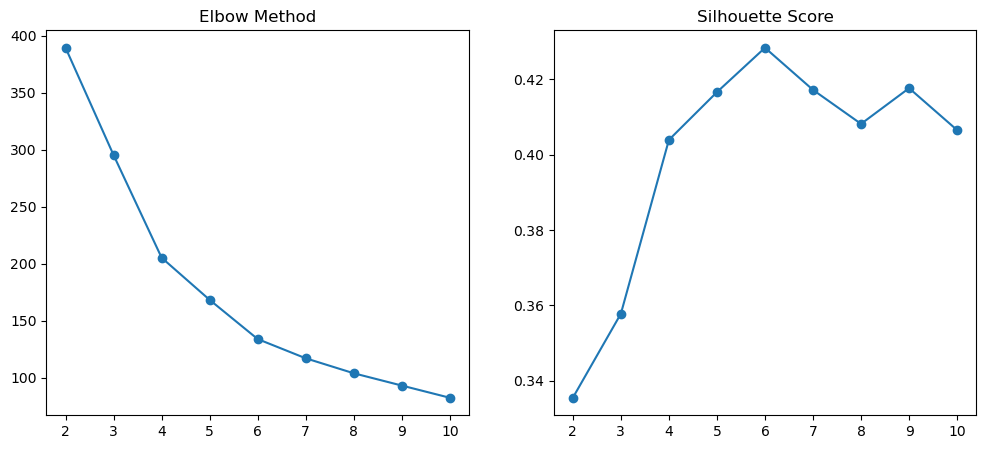

In [17]:
wcss, silhouette_scores = [], []
for k in range(2, 11):  # Start from 2 as Silhouette is invalid for k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df_scaled[numeric_cols])
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled[numeric_cols], kmeans.labels_))

# Plot Elbow Method & Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(range(2, 11), wcss, marker='o'); axes[0].set_title("Elbow Method")
axes[1].plot(range(2, 11), silhouette_scores, marker='o'); axes[1].set_title("Silhouette Score")
plt.show()



In [18]:
# Apply K-Means with optimal k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled[numeric_cols])


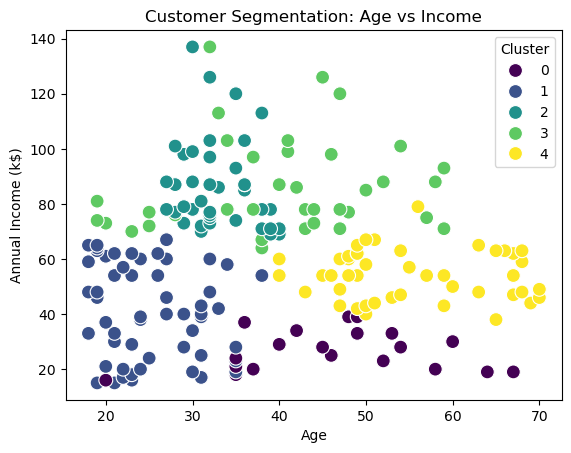

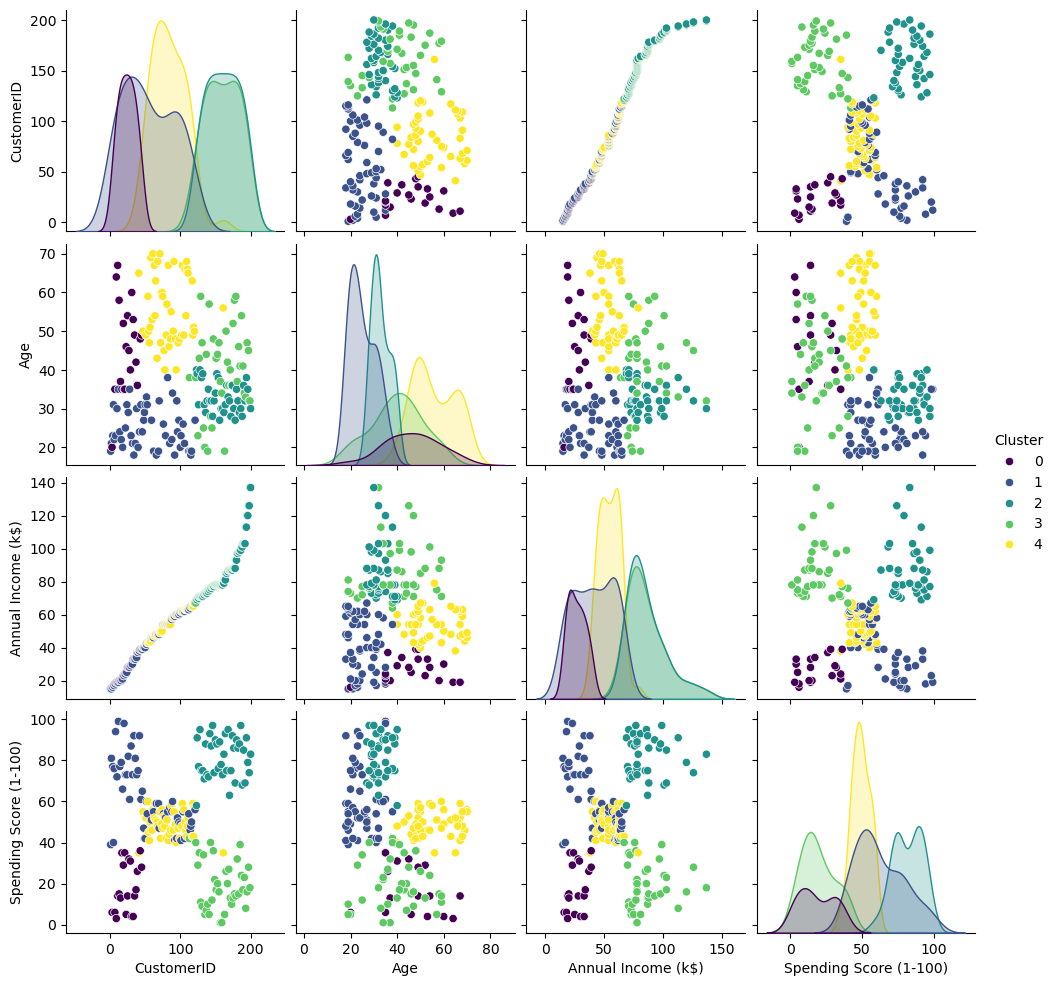

In [19]:
# Scatter Plot (Age vs Annual Income)
sns.scatterplot(x=df["Age"], y=df["Annual Income (k$)"], hue=df["Cluster"], palette="viridis", s=100)
plt.title("Customer Segmentation: Age vs Income")
plt.show()

# Pair Plot
sns.pairplot(df, hue="Cluster", palette="viridis")
plt.show()


In [20]:
# Save clustered dataset
df.to_csv("clustered_customer_data.csv", index=False)

# Display insights
print("\nCluster Insights:\n", df.groupby("Cluster")[numeric_cols].mean())

# Recommendations
print("\n📌 Recommendations:")
print("- High-income, high-spending → Premium marketing & loyalty programs.")
print("- Low-income, high-spending → Discount & cashback offers.")
print("- Young age, moderate spending → Social media ads.")
print("- Older customers → Personalized retention offers.")



Cluster Insights:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064

📌 Recommendations:
- High-income, high-spending → Premium marketing & loyalty programs.
- Low-income, high-spending → Discount & cashback offers.
- Young age, moderate spending → Social media ads.
- Older customers → Personalized retention offers.
